# Entrega 3 - Análisis de Errores
## Caracterización Detallada de Errores del Modelo

Este notebook contiene el análisis exhaustivo de los errores del modelo de predicción del Titanic:
- Caracterización detallada de errores (falsos positivos y negativos)
- Análisis de casos difíciles de clasificar
- Segmentación por subgrupos poblacionales
- Identificación de patrones en errores
- Estrategias de mejora basadas en análisis de errores

## Logistic Regresion 

## Random Forest

In [6]:
# --- Carga de modelo RandomForest y datos procesados ---

import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Cargar modelo RandomForest
if os.path.exists("../Entrega3/models/randomforest_model.pkl"):
    modelo_rf = joblib.load("../Entrega3/models/randomforest_model.pkl")
    print("✅ Modelo RandomForest cargado")
else:
    print("❌ No se encontró el modelo RandomForest")

# Cargar datos originales
data_path_rf = Path("../Entrega2/data/")
df_rf = pd.read_csv(data_path_rf / "Titanic_Dataset_Featured.csv")
print(f"✅ Dataset cargado: {df_rf.shape}")

# Preprocesamiento igual que en modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_rf = df_rf.drop('Survived', axis=1)
y_rf = df_rf['Survived']

numeric_features_rf = X_rf.select_dtypes(include=['int64', 'float64']).columns.tolist()
all_categorical_rf = X_rf.select_dtypes(include=['object']).columns.tolist()
variables_excluir_rf = ['Name', 'Ticket', 'Cabin', 'PassengerId']
categorical_features_rf = [col for col in all_categorical_rf if col not in variables_excluir_rf]

if 'PassengerId' in numeric_features_rf:
    numeric_features_rf.remove('PassengerId')

features_seleccionadas_rf = numeric_features_rf + categorical_features_rf
X_rf = X_rf[features_seleccionadas_rf]

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_rf),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features_rf)
    ]
)

X_train_rf, X_temp_rf, y_train_rf, y_temp_rf = train_test_split(
    X_rf, y_rf, test_size=0.4, random_state=42, stratify=y_rf
)
X_val_rf, X_test_rf, y_val_rf, y_test_rf = train_test_split(
    X_temp_rf, y_temp_rf, test_size=0.5, random_state=42, stratify=y_temp_rf
)

X_train_processed_rf = preprocessor_rf.fit_transform(X_train_rf)
X_val_processed_rf = preprocessor_rf.transform(X_val_rf)
X_test_processed_rf = preprocessor_rf.transform(X_test_rf)

print(f"✅ Datos procesados: Validation {X_val_processed_rf.shape}")

# Generar predicciones
if 'modelo_rf' in locals():
    y_pred_val_rf = modelo_rf.predict(X_val_processed_rf)
    y_pred_proba_val_rf = modelo_rf.predict_proba(X_val_processed_rf)[:, 1]
    print("✅ Predicciones generadas para validación")
else:
    print("❌ No se pudo generar predicciones (modelo no cargado)")

# DataFrame de validación
df_val_rf = df_rf.iloc[X_val_rf.index].copy()

✅ Modelo RandomForest cargado
✅ Dataset cargado: (891, 36)
✅ Datos procesados: Validation (178, 89)
✅ Predicciones generadas para validación


c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Errores por tipo:
tipo_error
Correcto          150
Falso Negativo     15
Falso Positivo     13
Name: count, dtype: int64

Características de Falso Positivo:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FarePerPerson_log,Age_sqrt,NameLength_sqrt,FamilySize_Category,IsMinor,DeckCategory,y_true,y_pred,proba,tipo_error
count,13.000000,13.0,13.000000,13,13,13.000000,13.000000,13.000000,13,13.000000,...,13.000000,13.000000,13.000000,13,13.000000,13,13.0,13.0,13.000000,13
unique,NaN,NaN,NaN,13,2,NaN,NaN,NaN,12,NaN,...,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,1
top,NaN,NaN,NaN,"Cacic, Miss. Marija",female,NaN,NaN,NaN,345773,NaN,...,NaN,NaN,NaN,Solo,NaN,Inferior,NaN,NaN,NaN,Falso Positivo
freq,NaN,NaN,NaN,1,9,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,7,NaN,10,NaN,NaN,NaN,13
mean,438.769231,0.0,2.538462,NaN,NaN,29.384615,0.384615,0.538462,NaN,19.439423,...,2.481554,5.288774,5.473027,NaN,0.076923,NaN,0.0,1.0,0.570790,NaN
std,206.566436,0.0,0.776250,NaN,NaN,14.561871,0.650444,0.776250,NaN,17.580191,...,0.519635,1.237449,1.102940,NaN,0.277350,NaN,0.0,0.0,0.059118,NaN
min,39.000000,0.0,1.000000,NaN,NaN,10.000000,0.000000,0.000000,NaN,7.750000,...,2.104134,3.162278,4.242641,NaN,0.000000,NaN,0.0,1.0,0.505845,NaN
25%,352.000000,0.0,2.000000,NaN,NaN,21.500000,0.000000,0.000000,NaN,8.050000,...,2.188856,4.636809,4.358899,NaN,0.000000,NaN,0.0,1.0,0.534857,NaN
50%,420.000000,0.0,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.000000,...,2.202765,5.291503,5.291503,NaN,0.000000,NaN,0.0,1.0,0.540413,NaN
75%,535.000000,0.0,3.000000,NaN,NaN,32.000000,1.000000,1.000000,NaN,24.150000,...,2.630089,5.656854,6.164414,NaN,0.000000,NaN,0.0,1.0,0.625357,NaN



Características de Falso Negativo:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FarePerPerson_log,Age_sqrt,NameLength_sqrt,FamilySize_Category,IsMinor,DeckCategory,y_true,y_pred,proba,tipo_error
count,15.000000,15.0,15.000000,15,15,15.000000,15.000000,15.000000,15,15.000000,...,15.000000,15.000000,15.000000,15,15.0,15,15.0,15.0,15.000000,15
unique,NaN,NaN,NaN,15,2,NaN,NaN,NaN,15,NaN,...,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,1
top,NaN,NaN,NaN,"Woolner, Mr. Hugh",male,NaN,NaN,NaN,19947,NaN,...,NaN,NaN,NaN,Solo,NaN,Inferior,NaN,NaN,NaN,Falso Negativo
freq,NaN,NaN,NaN,1,10,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,10,NaN,12,NaN,NaN,NaN,15
mean,357.200000,1.0,2.466667,NaN,NaN,32.300000,0.333333,0.400000,NaN,17.229440,...,2.323671,5.589656,5.334553,NaN,0.0,NaN,1.0,0.0,0.270974,NaN
std,231.075807,0.0,0.833809,NaN,NaN,12.755671,0.487950,1.298351,NaN,14.658002,...,0.839393,1.063560,1.004922,NaN,0.0,NaN,0.0,0.0,0.157503,NaN
min,24.000000,1.0,1.000000,NaN,NaN,18.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,4.242641,4.123106,NaN,0.0,NaN,1.0,0.0,0.040548,NaN
25%,176.000000,1.0,2.000000,NaN,NaN,23.500000,0.000000,0.000000,NaN,7.910400,...,2.171664,4.845208,4.628939,NaN,0.0,NaN,1.0,0.0,0.158286,NaN
50%,377.000000,1.0,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,10.500000,...,2.188856,5.291503,5.196152,NaN,0.0,NaN,1.0,0.0,0.252460,NaN
75%,515.000000,1.0,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,25.956250,...,2.442347,6.244485,5.656164,NaN,0.0,NaN,1.0,0.0,0.405044,NaN



Errores por Sex:
tipo_error  Correcto  Falso Negativo  Falso Positivo
Sex                                                 
female          0.78            0.08            0.14
male            0.88            0.09            0.04

Errores por Pclass:
tipo_error  Correcto  Falso Negativo  Falso Positivo
Pclass                                              
1               0.88            0.07            0.05
2               0.89            0.05            0.05
3               0.81            0.10            0.09

Top 20 casos con mayor incertidumbre:


,y_true,y_pred,proba,incertidumbre,Sex,Pclass,Age
102,0,0,0.499329,0.000671,male,1,21.0
534,0,1,0.505845,0.005845,female,3,30.0
142,1,1,0.507103,0.007103,female,3,24.0
423,0,1,0.508567,0.008567,female,3,28.0
438,0,0,0.488929,0.011071,male,1,64.0
382,0,1,0.516345,0.016345,male,3,32.0
174,0,0,0.483464,0.016536,male,1,56.0
23,1,0,0.481952,0.018048,male,1,28.0
328,1,0,0.478115,0.021885,female,3,31.0
293,0,0,0.474702,0.025298,female,3,24.0


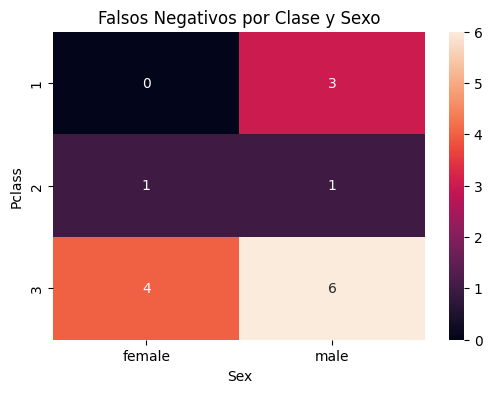

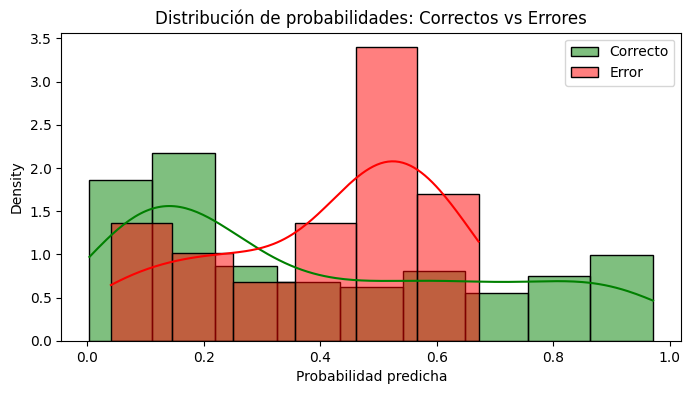

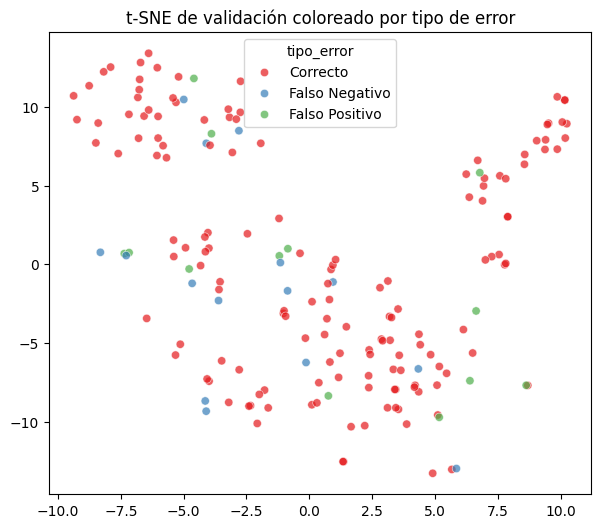

In [7]:
# 2.3 Análisis de Errores - RandomForest

# A. Caracterización de Errores
df_errores = df_val_rf.copy()
df_errores['y_true'] = y_val_rf.values
df_errores['y_pred'] = y_pred_val_rf
df_errores['proba'] = y_pred_proba_val_rf

df_errores['tipo_error'] = np.where(
    (df_errores['y_true'] == 1) & (df_errores['y_pred'] == 0), 'Falso Negativo',
    np.where((df_errores['y_true'] == 0) & (df_errores['y_pred'] == 1), 'Falso Positivo',
    np.where(df_errores['y_true'] == df_errores['y_pred'], 'Correcto', 'Otro'))
)

print("Errores por tipo:")
print(df_errores['tipo_error'].value_counts())

# Características de Falsos Positivos y Falsos Negativos
for tipo in ['Falso Positivo', 'Falso Negativo']:
    print(f"\nCaracterísticas de {tipo}:")
    display(df_errores[df_errores['tipo_error'] == tipo].describe(include='all'))

# ¿Errores en grupos específicos?
for col in ['Sex', 'Pclass', 'Grupo_Edad', 'Grupo_Familia']:
    if col in df_errores.columns:
        print(f"\nErrores por {col}:")
        print(pd.crosstab(df_errores[col], df_errores['tipo_error'], normalize='index').round(2))

# B. Casos Difíciles (mayor incertidumbre)
df_errores['incertidumbre'] = np.abs(df_errores['proba'] - 0.5)
casos_dificiles = df_errores.nsmallest(20, 'incertidumbre')
print("\nTop 20 casos con mayor incertidumbre:")
display(casos_dificiles[['y_true', 'y_pred', 'proba', 'incertidumbre'] + [c for c in ['Sex', 'Pclass', 'Age', 'Grupo_Edad', 'Grupo_Familia'] if c in df_errores.columns]])

# C. Visualización de Errores

# Heatmap de errores por características
if 'Pclass' in df_errores.columns and 'Sex' in df_errores.columns:
    plt.figure(figsize=(6,4))
    sns.heatmap(pd.crosstab(df_errores['Pclass'], df_errores['Sex'], values=(df_errores['tipo_error']=='Falso Negativo').astype(int), aggfunc='sum'), annot=True, fmt='d')
    plt.title('Falsos Negativos por Clase y Sexo')
    plt.show()

# Distribución de probabilidades
plt.figure(figsize=(8,4))
sns.histplot(df_errores[df_errores['tipo_error']=='Correcto']['proba'], color='green', label='Correcto', kde=True, stat='density')
sns.histplot(df_errores[df_errores['tipo_error']!='Correcto']['proba'], color='red', label='Error', kde=True, stat='density')
plt.legend()
plt.title('Distribución de probabilidades: Correctos vs Errores')
plt.xlabel('Probabilidad predicha')
plt.show()

# t-SNE coloreado por tipo de error
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_val_processed_rf)
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df_errores['tipo_error'], palette='Set1', alpha=0.7)
plt.title('t-SNE de validación coloreado por tipo de error')
plt.show()

## XG Booost

## Support Vector Machine